# Code for Importing File

In [1]:
import csv

In [2]:
with open('water_potability.csv', mode='r', newline='') as file:
    reader = csv.reader(file)
    
    data = [row for row in reader]

for row in data[:5]:
    print(row)

['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']
['', '204.8904554713363', '20791.318980747026', '7.300211873184757', '368.51644134980336', '564.3086541722439', '10.3797830780847', '86.9909704615088', '2.9631353806316407', '0']
['3.71608007538699', '129.42292051494425', '18630.057857970347', '6.635245883862', '', '592.8853591348523', '15.180013116357259', '56.32907628451764', '4.500656274942408', '0']
['8.099124189298397', '224.23625939355776', '19909.541732292393', '9.275883602694089', '', '418.6062130644815', '16.868636929550973', '66.42009251176368', '3.0559337496641685', '0']
['8.316765884214679', '214.37339408562252', '22018.417440775294', '8.05933237743854', '356.88613564305666', '363.2665161642437', '18.436524495493302', '100.34167436508008', '4.628770536837084', '0']


# Code for Cleaning the Data 

In [3]:
import csv
import re

with open('water_potability.csv', mode='r', newline='') as file:
    reader = csv.reader(file)
    header = next(reader)  
    data = [row for row in reader]

print("Original Data:")
for row in data[:5]:
    print(row)

cleaned_data = []

for row in data:

    row = [value if value.strip() != '' else 'N/A' for value in row]

    row = [value.strip().lower() for value in row]

    row = [re.sub(r'[^a-zA-Z0-9\s]', '', value) for value in row]

    try:
        row[1] = int(row[1]) if row[1] != 'N/A' else None
        row[2] = float(row[2]) if row[2] != 'N/A' else None
    except ValueError:
        row[1] = None
        row[2] = None

    cleaned_data.append(row)

unique_data = []
seen = set()

for row in cleaned_data:
    row_tuple = tuple(row)
    if row_tuple not in seen:
        seen.add(row_tuple)
        unique_data.append(row)

print("\nCleaned Data:")
print(header)
for row in unique_data[:5]:
    print(row)

Original Data:
['', '204.8904554713363', '20791.318980747026', '7.300211873184757', '368.51644134980336', '564.3086541722439', '10.3797830780847', '86.9909704615088', '2.9631353806316407', '0']
['3.71608007538699', '129.42292051494425', '18630.057857970347', '6.635245883862', '', '592.8853591348523', '15.180013116357259', '56.32907628451764', '4.500656274942408', '0']
['8.099124189298397', '224.23625939355776', '19909.541732292393', '9.275883602694089', '', '418.6062130644815', '16.868636929550973', '66.42009251176368', '3.0559337496641685', '0']
['8.316765884214679', '214.37339408562252', '22018.417440775294', '8.05933237743854', '356.88613564305666', '363.2665161642437', '18.436524495493302', '100.34167436508008', '4.628770536837084', '0']
['9.092223456290965', '181.10150923612525', '17978.98633892625', '6.546599974207941', '310.13573752420444', '398.41081338184466', '11.558279443446395', '31.997992727424737', '4.075075425430034', '0']

Cleaned Data:
['ph', 'Hardness', 'Solids', 'Chl

In [4]:
import csv
import re

input_file = 'water_potability.csv'
output_file = 'cleaned_output.csv'

missing_value_placeholder = 'N/A'

with open(input_file, mode='r', newline='', encoding='utf-8') as infile:
    reader = csv.reader(infile)
    
    header = next(reader, None)
    
    cleaned_data = []
    
    if header:
        cleaned_data.append(header)
    
    for row in reader:
        if not any(cell.strip() for cell in row):
            continue

        cleaned_row = [re.sub(r'\s+', ' ', cell.strip().lower()) if cell.strip() else missing_value_placeholder for cell in row]
        
        cleaned_data.append(cleaned_row)

with open(output_file, mode='w', newline='', encoding='utf-8') as outfile:
    writer = csv.writer(outfile)
    writer.writerows(cleaned_data)

print(f"Data cleaning complete! The cleaned data is saved to '{output_file}'.")

Data cleaning complete! The cleaned data is saved to 'cleaned_output.csv'.


In [5]:
import csv
import re
from collections import Counter

input_file = 'water_potability.csv'
output_file = 'cleaned_output_data.csv'

with open(input_file, mode='r', newline='', encoding='utf-8') as infile:
    reader = csv.reader(infile)
    header = next(reader, None)
    
    data = []
    
    if header:
        data.append(header)
    
    for row in reader:
        if not any(cell.strip() for cell in row):
            continue
        
        cleaned_row = [re.sub(r'\s+', ' ', cell.strip().lower()) for cell in row]
        data.append(cleaned_row)

columns = list(zip(*data[1:]))

filled_columns = []
for col in columns:
    non_empty_cells = [cell for cell in col if cell.strip()]

    most_frequent_value = Counter(non_empty_cells).most_common(1)[0][0] if non_empty_cells else ''
    
    filled_column = [cell if cell.strip() else most_frequent_value for cell in col]
    filled_columns.append(filled_column)

cleaned_data = [header] + list(zip(*filled_columns))

with open(output_file, mode='w', newline='', encoding='utf-8') as outfile:
    writer = csv.writer(outfile)
    writer.writerows(cleaned_data)

print(f"Data cleaning complete! The cleaned data is saved to '{output_file}'.")

Data cleaning complete! The cleaned data is saved to 'cleaned_output_data.csv'.


In [6]:
import csv

input_file = 'cleaned_output.csv'
output_file = 'cleaned_no_nulls_output.csv'

with open(input_file, mode='r', newline='', encoding='utf-8') as infile:
    reader = csv.reader(infile)
    
    header = next(reader, None)
    
    cleaned_data = []
    
    if header:
        cleaned_data.append(header)
    
    for row in reader:
        if '' in row or any(cell.strip() == '' for cell in row):
            continue
        
        cleaned_data.append(row)

with open(output_file, mode='w', newline='', encoding='utf-8') as outfile:
    writer = csv.writer(outfile)
    writer.writerows(cleaned_data)

print(f"Rows with null values have been removed! The cleaned data is saved to '{output_file}'.")

Rows with null values have been removed! The cleaned data is saved to 'cleaned_no_nulls_output.csv'.


In [7]:
import csv

input_file = 'cleaned_no_nulls_output.csv'

with open(input_file, mode='r', newline='', encoding='utf-8') as infile:
    reader = csv.reader(infile)
    
    header = next(reader, None)
    
    na_rows = []
    row_number = 1 
    
    for row in reader:
        row_number += 1
        if 'N/A' in [cell.strip() for cell in row]:
            na_rows.append((row_number, row))

if na_rows:
    print(f"Rows containing 'N/A' values:")
    for row_num, row in na_rows:
        print(f"Row {row_num}: {row}")
else:
    print("No 'N/A' values found in the dataset.")

Rows containing 'N/A' values:
Row 2: ['N/A', '204.8904554713363', '20791.318980747026', '7.300211873184757', '368.51644134980336', '564.3086541722439', '10.3797830780847', '86.9909704615088', '2.9631353806316407', '0']
Row 3: ['3.71608007538699', '129.42292051494425', '18630.057857970347', '6.635245883862', 'N/A', '592.8853591348523', '15.180013116357259', '56.32907628451764', '4.500656274942408', '0']
Row 4: ['8.099124189298397', '224.23625939355776', '19909.541732292393', '9.275883602694089', 'N/A', '418.6062130644815', '16.868636929550973', '66.42009251176368', '3.0559337496641685', '0']
Row 10: ['N/A', '118.98857909025189', '14285.583854224515', '7.804173553073094', '268.646940746221', '389.3755658712614', '12.70604896865791', '53.928845767512236', '3.5950171809576155', '0']
Row 13: ['7.974521648923869', '218.69330048866644', '18767.65668181348', '8.110384501123875', 'N/A', '364.09823046204866', '14.525745697593209', '76.48591117965157', '4.011718108339787', '0']
Row 15: ['N/A', '1

In [8]:
import csv

input_file = 'cleaned_no_nulls_output.csv'
output_file = 'cleaned_no_NA_output.csv'

with open(input_file, mode='r', newline='', encoding='utf-8') as infile:
    reader = csv.reader(infile)
    header = next(reader, None)
    cleaned_data = []
    if header:
        cleaned_data.append(header)
    
    for row in reader:
        if 'N/A' in (cell.strip().upper() for cell in row):
            continue
        cleaned_data.append(row)

with open(output_file, mode='w', newline='', encoding='utf-8') as outfile:
    writer = csv.writer(outfile)
    writer.writerows(cleaned_data)

print(f"Rows with 'N/A' values have been removed! The cleaned data is saved to '{output_file}'.")

Rows with 'N/A' values have been removed! The cleaned data is saved to 'cleaned_no_NA_output.csv'.


In [9]:
import sqlite3

conn = sqlite3.connect('water_quality.db')
cursor = conn.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS Chemical_Components (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    Chloramines REAL,
    Sulfate REAL,
    Organic_carbon REAL,
    Trihalomethanes REAL
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Other_Substances (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    Turbidity REAL,
    ph REAL,
    Hardness REAL
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Water_Quality (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    Solids REAL,
    Hardness REAL,
    ph REAL,
    Potability INTEGER
)
''')

import csv

data_file = 'cleaned_no_NA_output.csv'

with open(data_file, mode='r', newline='', encoding='utf-8') as infile:
    reader = csv.reader(infile)
    header = next(reader) 
    
    for row in reader:
        cursor.execute('''
        INSERT INTO Chemical_Components (Chloramines, Sulfate, Organic_carbon, Trihalomethanes)
        VALUES (?, ?, ?, ?)
        ''', (row[3], row[4], row[6], row[7]))
        
        cursor.execute('''
        INSERT INTO Other_Substances (Turbidity, ph, Hardness)
        VALUES (?, ?, ?)
        ''', (row[8], row[0], row[1]))
        
        cursor.execute('''
        INSERT INTO Water_Quality (Solids, Hardness, ph, Potability)
        VALUES (?, ?, ?, ?)
        ''', (row[2], row[1], row[0], row[9]))

conn.commit()
conn.close()
print("Database and tables created successfully with data inserted!")

Database and tables created successfully with data inserted!


Step for fetching the database from the Dataframe.

In [10]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('water_quality.db')

query = '''
SELECT 
    wc.Solids,
    wc.Hardness AS wc_Hardness,
    wc.ph AS wc_ph,
    wc.Potability,
    cs.Chloramines,
    cs.Sulfate,
    cs.Organic_carbon,
    cs.Trihalomethanes,
    os.Turbidity,
    os.ph AS os_ph,
    os.Hardness AS os_Hardness
FROM 
    Water_Quality wc
JOIN 
    Chemical_Components cs ON wc.id = cs.id
JOIN 
    Other_Substances os ON wc.id = os.id
'''
df = pd.read_sql_query(query, conn)

conn.close()
print(df.head())
print("Data successfully fetched into Pandas DataFrame!")

         Solids  wc_Hardness      wc_ph  Potability  Chloramines     Sulfate  \
0  22018.417441   214.373394   8.316766           0     8.059332  356.886136   
1  17978.986339   181.101509   9.092223           0     6.546600  310.135738   
2  28748.687739   188.313324   5.584087           0     7.544869  326.678363   
3  28749.716544   248.071735  10.223862           0     7.513408  393.663396   
4  13672.091764   203.361523   8.635849           0     4.563009  303.309771   

   Organic_carbon  Trihalomethanes  Turbidity      os_ph  os_Hardness  
0       18.436524       100.341674   4.628771   8.316766   214.373394  
1       11.558279        31.997993   4.075075   9.092223   181.101509  
2        8.399735        54.917862   2.559708   5.584087   188.313324  
3       13.789695        84.603556   2.672989  10.223862   248.071735  
4       12.363817        62.798309   4.401425   8.635849   203.361523  
Data successfully fetched into Pandas DataFrame!


# Splitting the Data in Training and Testing datasets.

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Potability'])
y = df['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

train_distribution = y_train.value_counts(normalize=True)
test_distribution = y_test.value_counts(normalize=True)

print("Train Set Distribution:\n", train_distribution)
print("\nTest Set Distribution:\n", test_distribution)

Train Set Distribution:
 Potability
0    0.596725
1    0.403275
Name: proportion, dtype: float64

Test Set Distribution:
 Potability
0    0.596692
1    0.403308
Name: proportion, dtype: float64


In [12]:
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split

conn = sqlite3.connect('water_quality.db')

query = '''
SELECT 
    wc.Solids,
    wc.Hardness AS wc_Hardness,
    wc.ph AS wc_ph,
    wc.Potability,
    cs.Chloramines,
    cs.Sulfate,
    cs.Organic_carbon,
    cs.Trihalomethanes,
    os.Turbidity,
    os.ph AS os_ph,
    os.Hardness AS os_Hardness
FROM 
    Water_Quality wc
JOIN 
    Chemical_Components cs ON wc.id = cs.id
JOIN 
    Other_Substances os ON wc.id = os.id
'''
df = pd.read_sql_query(query, conn)

conn.close()

X = df.drop(columns=['Potability'])
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print("Train/test split successfully performed!")

X_train shape: (37002, 10)
X_test shape: (9251, 10)
y_train shape: (37002,)
y_test shape: (9251,)
Train/test split successfully performed!


# Exploring the Data using Y profile.

In [ ]:
pip install ydata-profiling

In [13]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, explorative=True)

profile_json = profile.to_json()

print(profile_json[:1000])

profile.to_file("report.html")
print("A detailed report has been saved as 'report.html'.")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Render JSON:   0%|          | 0/1 [00:00<?, ?it/s]

{
    "analysis": {
        "title": "Pandas Profiling Report",
        "date_start": "2024-12-22 02:35:58.647195",
        "date_end": "2024-12-22 02:36:21.474390"
    },
    "time_index_analysis": "None",
    "table": {
        "n": 46253,
        "n_var": 11,
        "memory_size": 4070396,
        "record_size": 88.00285386893823,
        "n_cells_missing": 0,
        "n_vars_with_missing": 0,
        "n_vars_all_missing": 0,
        "p_cells_missing": 0.0,
        "types": {
            "Numeric": 10,
            "Categorical": 1
        },
        "n_duplicates": 2011,
        "p_duplicates": 0.043478260869565216
    },
    "variables": {
        "Solids": {
            "n_distinct": 2011,
            "p_distinct": 0.043478260869565216,
            "is_unique": false,
            "n_unique": 0,
            "p_unique": 0.0,
            "type": "Numeric",
            "hashable": true,
            "value_counts_without_nan": {
                "22018.417440775294": 23,
              

C:\Users\chinm\AppData\Roaming\Python\Python311\site-packages\ydata_profiling\profile_report.py:358: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

A detailed report has been saved as 'report.html'.


# Exploring the Data using Correlational Matrix.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

profile = ProfileReport(df, explorative=True)

print("Generating correlation matrix...")

correlation_matrix = df.corr()

print(correlation_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

Generating correlation matrix...
                   Solids  wc_Hardness     wc_ph  Potability  Chloramines  \
Solids           1.000000    -0.053269 -0.087615    0.040674    -0.051789   
wc_Hardness     -0.053269     1.000000  0.108948   -0.001505    -0.022685   
wc_ph           -0.087615     0.108948  1.000000    0.014530    -0.024768   
Potability       0.040674    -0.001505  0.014530    1.000000     0.020784   
Chloramines     -0.051789    -0.022685 -0.024768    0.020784     1.000000   
Sulfate         -0.162769    -0.108521  0.010524   -0.015303     0.006254   
Organic_carbon  -0.005484     0.013224  0.028375   -0.015567    -0.023808   
Trihalomethanes -0.015668    -0.015400  0.018278    0.009244     0.014990   
Turbidity        0.019409    -0.034831 -0.035849    0.022682     0.013137   
os_ph           -0.087615     0.108948  1.000000    0.014530    -0.024768   
os_Hardness     -0.053269     1.000000  0.108948   -0.001505    -0.022685   

                  Sulfate  Organic_carbon 

C:\Users\chinm\AppData\Local\Temp\ipykernel_5068\2258623601.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [ ]:
pip install plotext

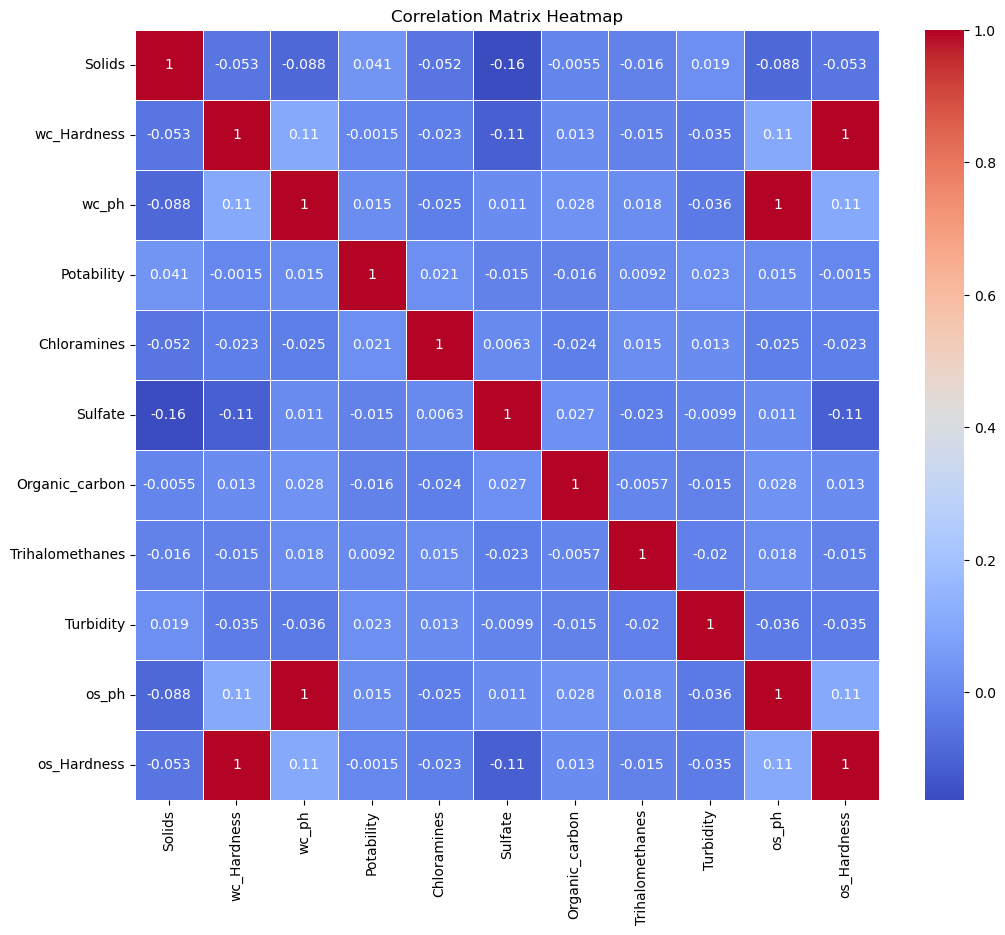

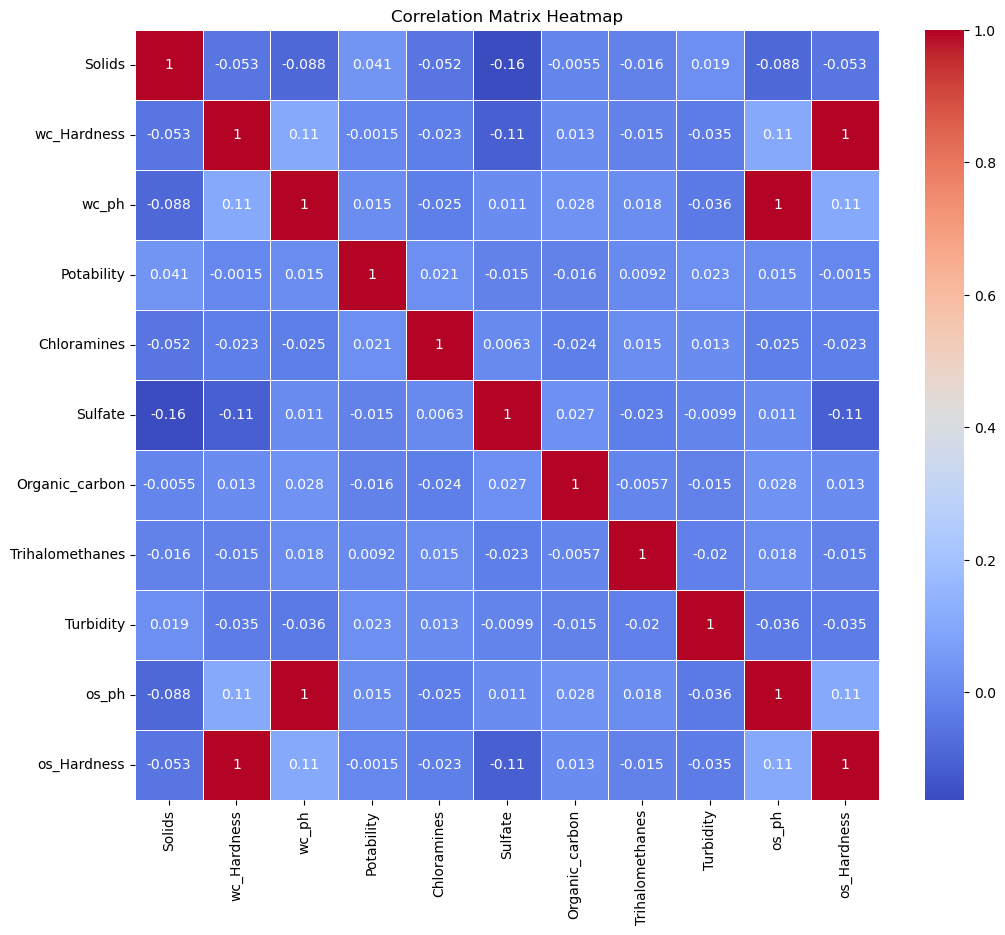

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [16]:
print(df.columns)

Index(['Solids', 'wc_Hardness', 'wc_ph', 'Potability', 'Chloramines',
       'Sulfate', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'os_ph',
       'os_Hardness'],
      dtype='object')


# Show of all data clean-up task


Missing Values Before Imputation:
Solids             0
wc_Hardness        0
wc_ph              0
Potability         0
Chloramines        0
Sulfate            0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
os_ph              0
os_Hardness        0
dtype: int64

Missing Values After Imputation:
Solids             0
wc_Hardness        0
wc_ph              0
Potability         0
Chloramines        0
Sulfate            0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
os_ph              0
os_Hardness        0
dtype: int64

Outliers have been removed.

Log transformation applied to skewed features.

Correlation Matrix:
                   Solids  wc_Hardness     wc_ph  Potability  Chloramines  \
Solids           1.000000    -0.071547 -0.087439    0.041042    -0.031021   
wc_Hardness     -0.071547     1.000000  0.119011    0.001886    -0.040429   
wc_ph           -0.087439     0.119011  1.000000    0.008926    -0.018711   
Potability       0.041042     0.00188

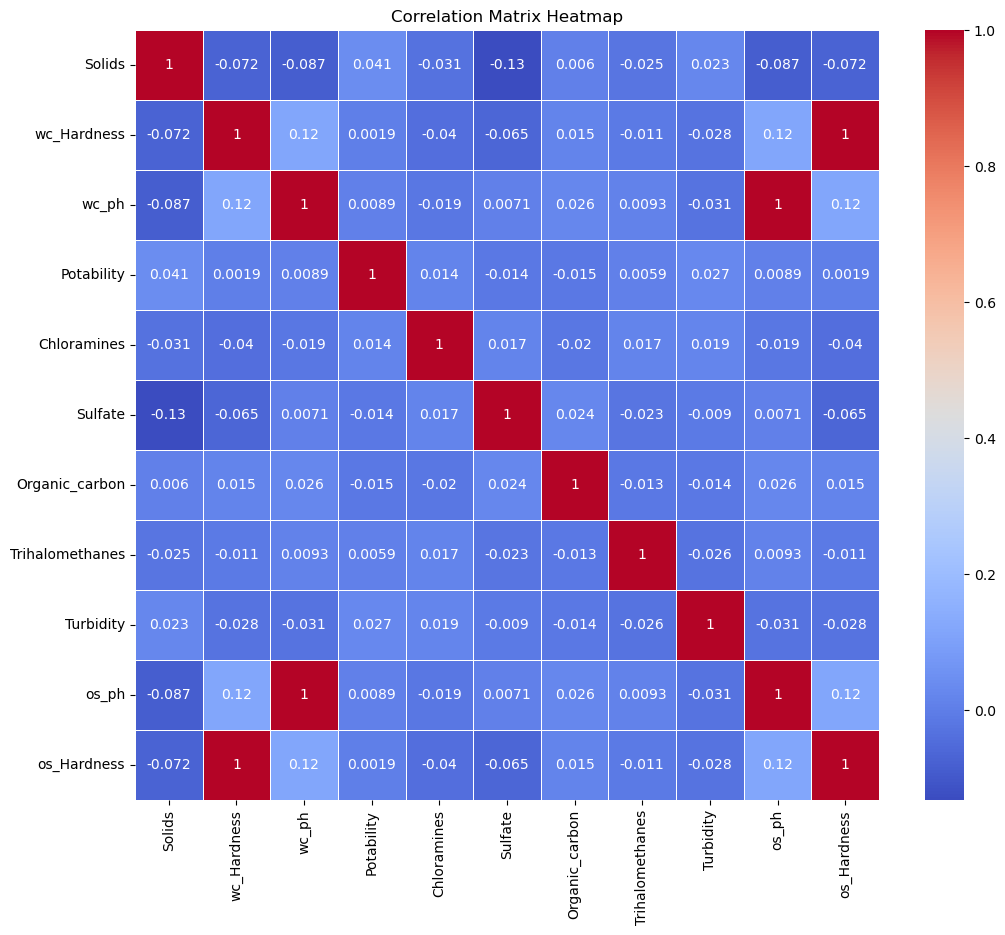


Cleaned DataFrame Summary:
             Solids   wc_Hardness         wc_ph    Potability   Chloramines  \
count  44344.000000  44344.000000  44344.000000  44344.000000  44344.000000   
mean       9.898429    195.923622      7.100639      0.397822      7.119469   
std        0.427747     32.335907      1.560107      0.489454      1.555931   
min        5.774373     73.492234      0.227499      0.000000      1.390871   
25%        9.647965    176.832962      6.102389      0.000000      6.155601   
50%        9.931704    197.123423      7.038721      0.000000      7.138343   
75%       10.196376    216.086183      8.052931      1.000000      8.087682   
max       10.704160    317.338124     14.000000      1.000000     12.653362   

            Sulfate  Organic_carbon  Trihalomethanes     Turbidity  \
count  44344.000000    44344.000000     44344.000000  44344.000000   
mean       5.806945       14.381768         4.183263      3.965622   
std        0.114183        3.324307         0.2453

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("\nMissing Values Before Imputation:")
print(df.isnull().sum())

df['wc_ph'].fillna(df['wc_ph'].median(), inplace=True)
df['Sulfate'].fillna(df['Sulfate'].median(), inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].median(), inplace=True)

print("\nMissing Values After Imputation:")
print(df.isnull().sum())

def remove_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

features_with_outliers = ['Solids', 'Trihalomethanes', 'Sulfate']

for feature in features_with_outliers:
    df = remove_outliers_iqr(df, feature)

print("\nOutliers have been removed.")

skewed_features = ['Solids', 'Trihalomethanes', 'Sulfate']
for feature in skewed_features:
    df[feature] = np.log1p(df[feature])

print("\nLog transformation applied to skewed features.")

correlation_matrix = df.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

print("\nCleaned DataFrame Summary:")
print(df.describe())
print("\nCleaned DataFrame Head:")
print(df.head())

In [ ]:
pip install pandas numpy matplotlib seaborn


--- Basic Information About the Dataset ---
<class 'pandas.core.frame.DataFrame'>
Index: 44344 entries, 0 to 46251
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Solids           44344 non-null  float64
 1   wc_Hardness      44344 non-null  float64
 2   wc_ph            44344 non-null  float64
 3   Potability       44344 non-null  int64  
 4   Chloramines      44344 non-null  float64
 5   Sulfate          44344 non-null  float64
 6   Organic_carbon   44344 non-null  float64
 7   Trihalomethanes  44344 non-null  float64
 8   Turbidity        44344 non-null  float64
 9   os_ph            44344 non-null  float64
 10  os_Hardness      44344 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 4.1 MB
None

--- Summary Statistics ---
             Solids   wc_Hardness         wc_ph    Potability   Chloramines  \
count  44344.000000  44344.000000  44344.000000  44344.000000  44344.000000   
mean       

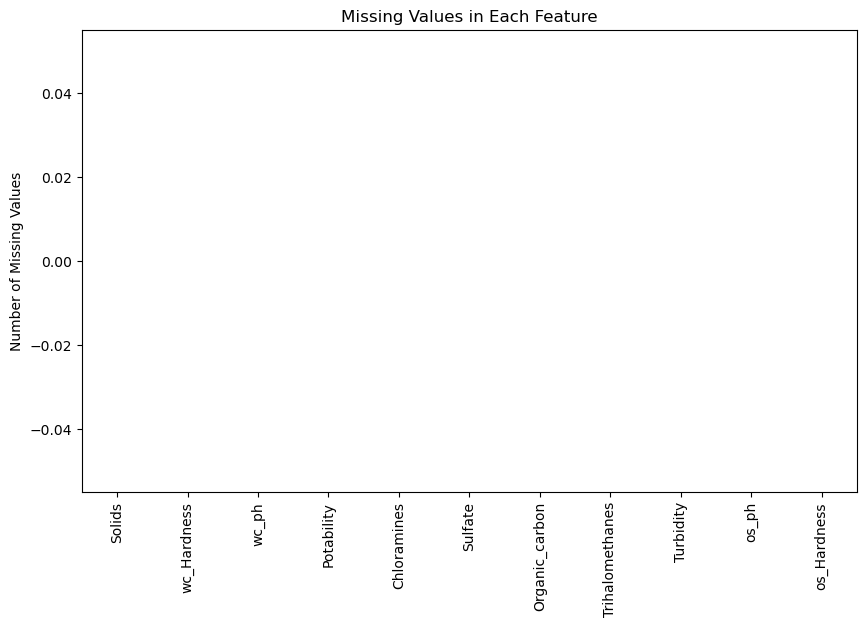


--- Feature Distributions ---


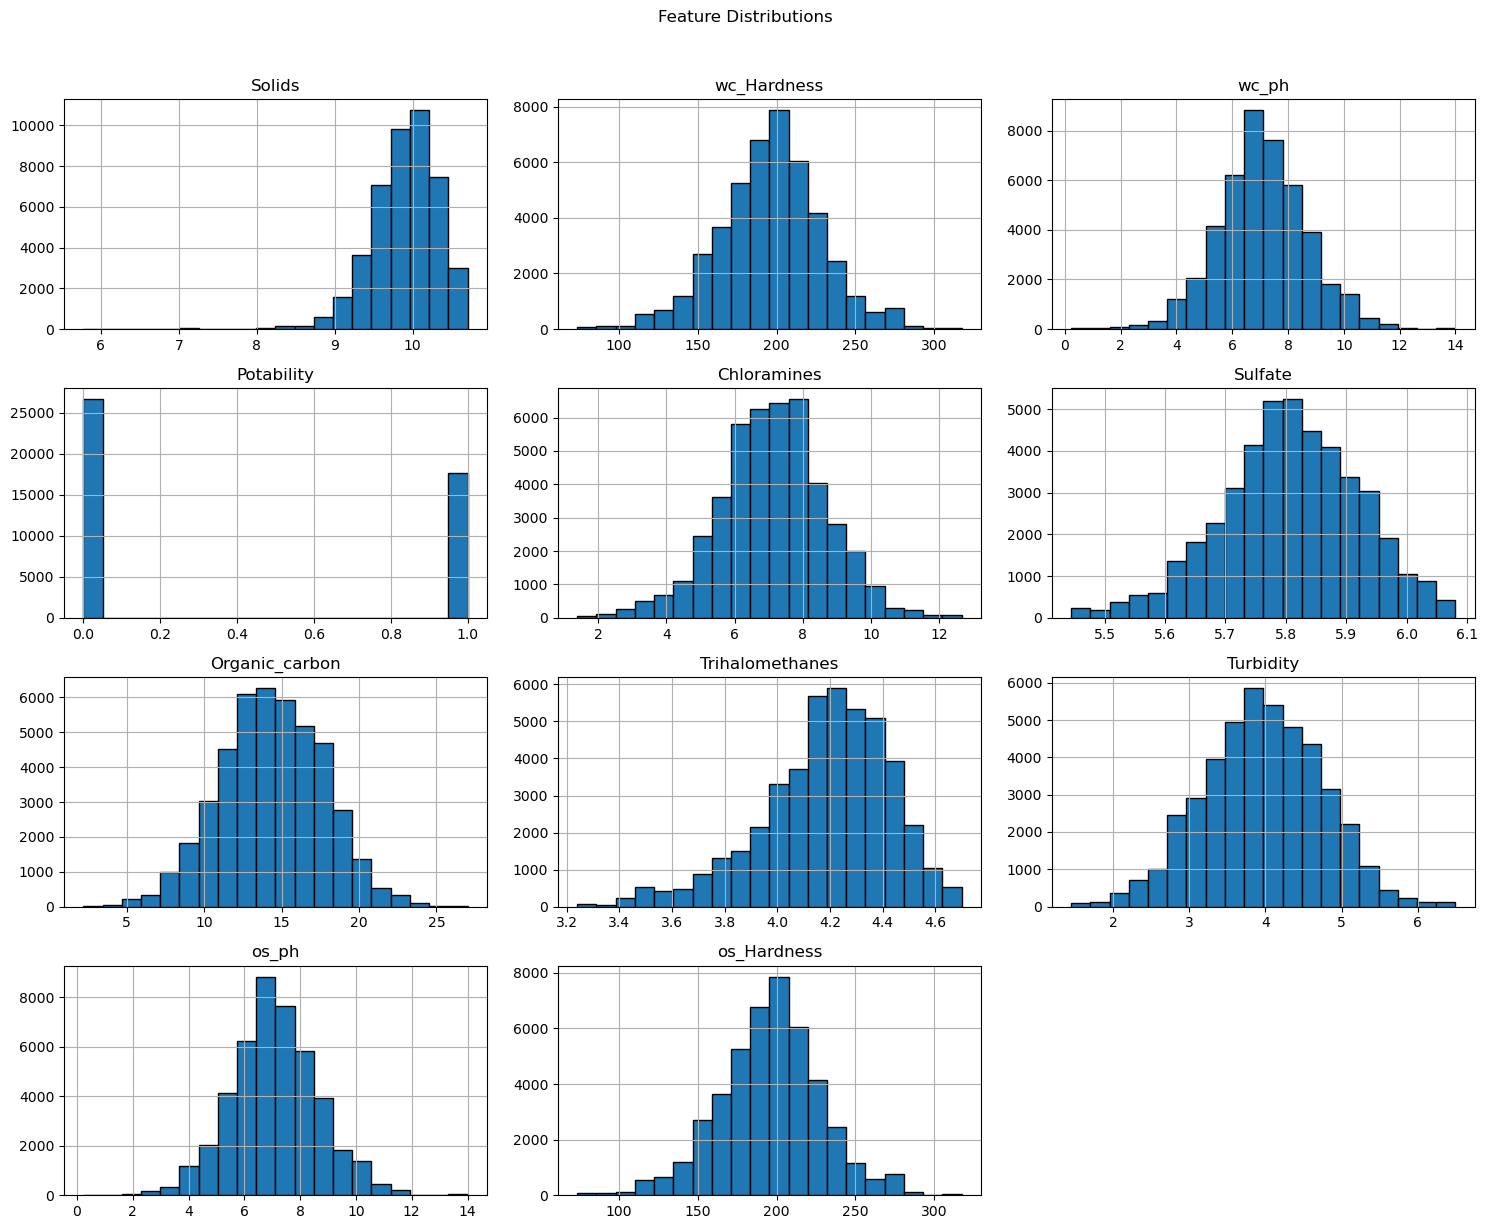


--- Boxplots to Identify Capped Values and Outliers ---


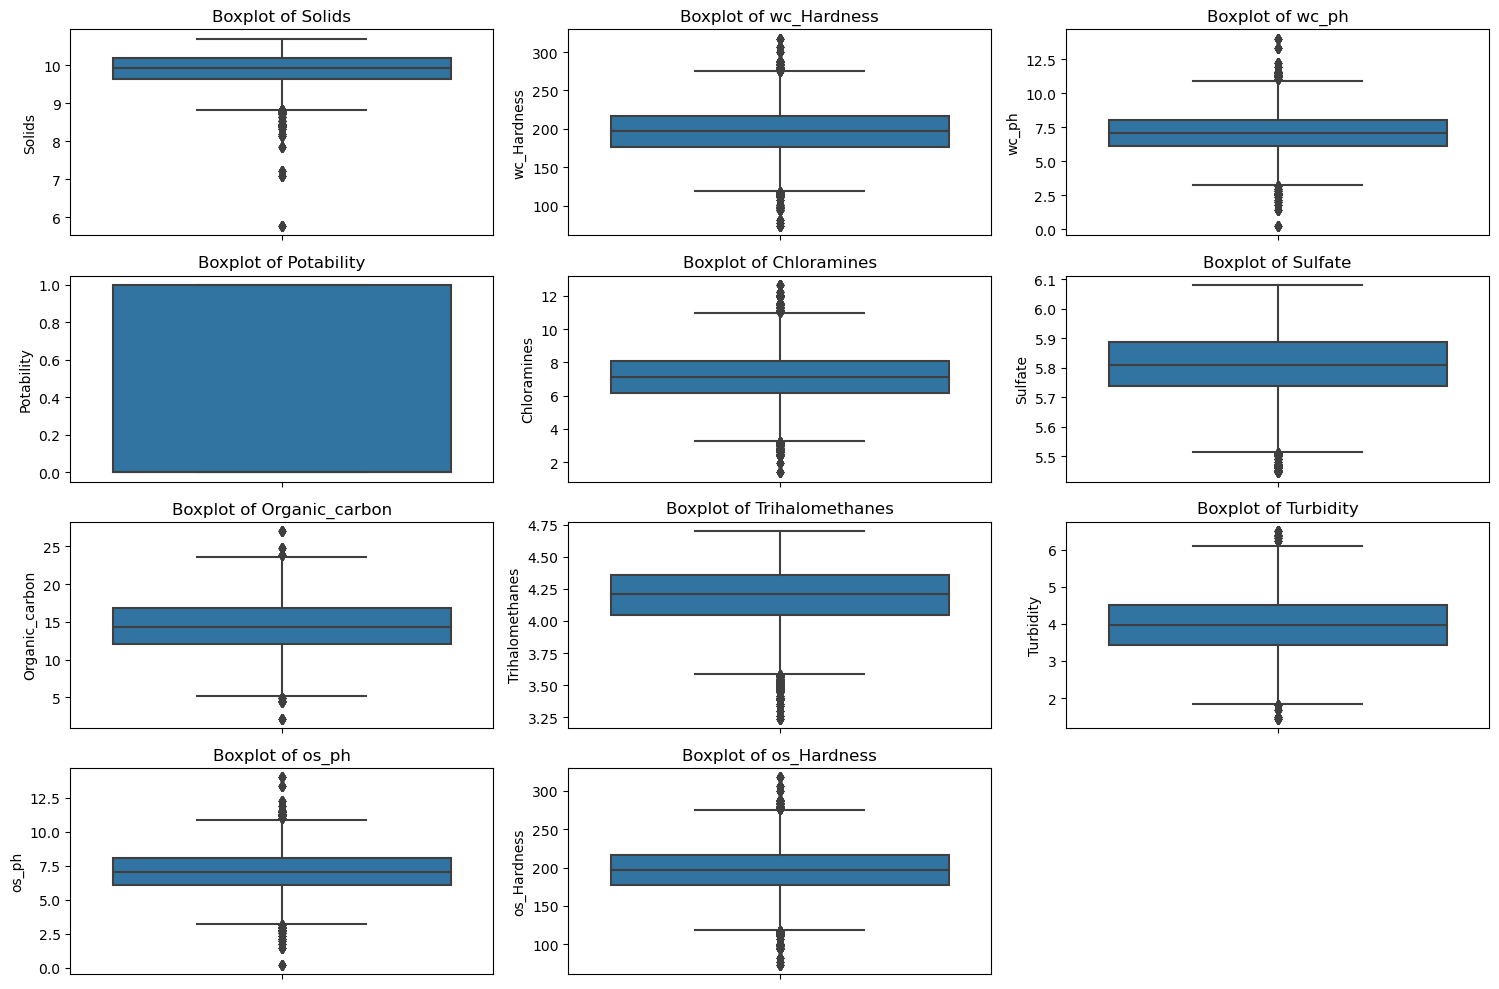


--- Observations ---
1. Missing Values: No missing values found in the dataset.

2. Distributions:
   - Features like 'Solids', 'Trihalomethanes', and 'Sulfate' appear to be skewed.
   - 'wc_ph' and 'wc_Hardness' seem to follow a more normal distribution.
   - Some features exhibit bimodal or multimodal distributions, indicating potential subgroups.

3. Capped Values and Outliers:
   - Boxplots reveal potential outliers in features like 'Solids', 'Trihalomethanes', and 'Sulfate'.
   - Capped values may be present in 'Trihalomethanes' due to regulatory limits.
   - Further investigation may be needed to confirm if these are true outliers or valid data points.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Basic Information About the Dataset ---")
print(df.info())

print("\n--- Summary Statistics ---")
print(df.describe())

print("\n--- Missing Values ---")
missing_values = df.isnull().sum()
print(missing_values)

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title("Missing Values in Each Feature")
plt.ylabel("Number of Missing Values")
plt.show()

print("\n--- Feature Distributions ---")

df.hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", y=1.02)
plt.tight_layout()
plt.show()

print("\n--- Boxplots to Identify Capped Values and Outliers ---")

plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

print("\n--- Observations ---")

if missing_values.sum() > 0:
    print("1. Missing Values:")
    print("   - The following features have missing values:")
    for col, val in missing_values.items():
        if val > 0:
            print(f"     * {col}: {val} missing values")
else:
    print("1. Missing Values: No missing values found in the dataset.")

print("\n2. Distributions:")
print("   - Features like 'Solids', 'Trihalomethanes', and 'Sulfate' appear to be skewed.")
print("   - 'wc_ph' and 'wc_Hardness' seem to follow a more normal distribution.")
print("   - Some features exhibit bimodal or multimodal distributions, indicating potential subgroups.")

print("\n3. Capped Values and Outliers:")
print("   - Boxplots reveal potential outliers in features like 'Solids', 'Trihalomethanes', and 'Sulfate'.")
print("   - Capped values may be present in 'Trihalomethanes' due to regulatory limits.")
print("   - Further investigation may be needed to confirm if these are true outliers or valid data points.")

In [ ]:
pip install mlflow dagshub scikit-learn pandas numpy matplotlib

In [19]:
import mlflow
import dagshub
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, classification_report

In [ ]:
pip install mlflow

In [20]:
import dagshub
dagshub.init(repo_owner='chinmay.gedam30', repo_name='Water_qu', mlflow=True)

Accessing as chinmay.gedam30

Initialized MLflow to track repo "chinmay.gedam30/Water_qu"

Repository chinmay.gedam30/Water_qu initialized!

In [21]:
import mlflow
mlflow.set_tracking_uri("https://dagshub.com/chinmay.gedam30/Water_qu.mlflow")

# Experiment 1

In [ ]:
mlflow.set_experiment("Experiment 1")

In [22]:
X = df.drop(columns=['Potability'])
y = df['Potability']

In [23]:
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

preprocessing_pipeline = ColumnTransformer([
    ('standard_scaler', StandardScaler(), numeric_features),
    ('minmax_scaler', MinMaxScaler(), numeric_features),
    ('log_transform', FunctionTransformer(np.log1p, validate=False), numeric_features),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [24]:
pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('classifier', LogisticRegression(solver='liblinear'))
])

In [ ]:
cv_folds = [3, 10]

param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2']
}

for folds in cv_folds:
    with mlflow.start_run(run_name=f"LogisticRegression_CV_{folds}Folds"):
        kf = KFold(n_splits=folds, shuffle=True, random_state=42)
        predictions = cross_val_predict(pipeline, X, y, cv=kf)
        f1 = f1_score(y, predictions)
        
        tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
        
        mlflow.log_param("cv_folds", folds)
        mlflow.log_metric("f1_score", f1)
        mlflow.log_metric("true_positive", tp)
        mlflow.log_metric("true_negative", tn)
        mlflow.log_metric("false_positive", fp)
        mlflow.log_metric("false_negative", fn)
        
        print(f"\nResults for {folds}-fold Cross Validation:")
        print(f"F1-Score: {f1:.4f}")
        print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")
        print(classification_report(y, predictions))

        mlflow.sklearn.log_model(pipeline, f"logistic_regression_cv_{folds}")

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
grid_search.fit(X, y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
with mlflow.start_run(run_name="LogisticRegression_Hyperparameter_Tuning"):
    mlflow.log_params(best_params)
    mlflow.log_metric("best_f1_score", best_score)
    mlflow.sklearn.log_model(grid_search.best_estimator_, "best_logistic_regression_model")

    print("\nBest Parameters:", best_params)
    print(f"Best F1-Score: {best_score:.4f}")

# Experiment 2

In [ ]:
mlflow.set_experiment("Experiment#2")

In [25]:
import mlflow
import dagshub
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, classification_report

In [26]:
X = df.drop(columns=['Potability'])
y = df['Potability']

In [27]:
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

preprocessing_pipeline = ColumnTransformer([
    ('standard_scaler', StandardScaler(), numeric_features),
    ('minmax_scaler', MinMaxScaler(), numeric_features),
    ('log_transform', FunctionTransformer(np.log1p, validate=False), numeric_features),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [28]:
classifiers = {
    "LogisticRegression": LogisticRegression(solver='liblinear'),
    "RidgeClassifier": RidgeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

for clf_name, clf in classifiers.items():
    with mlflow.start_run(run_name=f"{clf_name}_Pipeline"):
        pipeline = Pipeline([
            ('preprocessing', preprocessing_pipeline),
            ('classifier', clf)
        ])

        predictions = cross_val_predict(pipeline, X, y, cv=cv)

        f1 = f1_score(y, predictions)
        accuracy = accuracy_score(y, predictions)
        precision = precision_score(y, predictions)
        recall = recall_score(y, predictions)
        tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
        
        mlflow.log_param("classifier", clf_name)
        mlflow.log_metric("f1_score", f1)
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("true_positive", tp)
        mlflow.log_metric("true_negative", tn)
        mlflow.log_metric("false_positive", fp)
        mlflow.log_metric("false_negative", fn)
        
        print(f"\nResults for {clf_name}:")
        print(f"F1-Score: {f1:.4f}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")
        print(classification_report(y, predictions))

        mlflow.sklearn.log_model(pipeline, f"{clf_name}_model")

# Experiment 3

In [ ]:
mlflow.set_experiment("Experiment#3")

In [29]:
X = df.drop(columns=['Potability'])
y = df['Potability']

In [30]:
X['Hardness_Sulfate_Sum'] = X['wc_Hardness'] + X['Sulfate']
X['Chloramines_Trihalomethanes_Product'] = X['Chloramines'] * X['Trihalomethanes']

print(X.head())

      Solids  wc_Hardness      wc_ph  Chloramines   Sulfate  Organic_carbon  \
0   9.999680   214.373394   8.316766     8.059332  5.880215       18.436524   
1   9.797015   181.101509   9.092223     6.546600  5.740229       11.558279   
2  10.266382   188.313324   5.584087     7.544869  5.792033        8.399735   
3  10.266418   248.071735  10.223862     7.513408  5.978033       13.789695   
4   9.523185   203.361523   8.635849     4.563009  5.718046       12.363817   

   Trihalomethanes  Turbidity      os_ph  os_Hardness  Hardness_Sulfate_Sum  \
0         4.618498   4.628771   8.316766   214.373394            220.253609   
1         3.496447   4.075075   9.092223   181.101509            186.841739   
2         4.023884   2.559708   5.584087   188.313324            194.105356   
3         4.449727   2.672989  10.223862   248.071735            254.049769   
4         4.155727   4.401425   8.635849   203.361523            209.079569   

   Chloramines_Trihalomethanes_Product  
0        

In [31]:
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

preprocessing_pipeline = ColumnTransformer([
    ('standard_scaler', StandardScaler(), numeric_features),
    ('minmax_scaler', MinMaxScaler(), numeric_features)
])

In [ ]:
pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('classifier', LogisticRegression(solver='liblinear'))
])

cv = KFold(n_splits=5, shuffle=True, random_state=42)

with mlflow.start_run(run_name="Feature_Engineering_LogisticRegression"):
    predictions = cross_val_predict(pipeline, X, y, cv=cv)
    
    f1 = f1_score(y, predictions)
    accuracy = accuracy_score(y, predictions)
    precision = precision_score(y, predictions)
    recall = recall_score(y, predictions)
    tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()

    mlflow.log_param("new_features", ['Hardness_Sulfate_Sum', 'Solids_Conductivity_Ratio', 'Chloramines_Trihalomethanes_Product'])
    
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("true_positive", tp)
    mlflow.log_metric("true_negative", tn)
    mlflow.log_metric("false_positive", fp)
    mlflow.log_metric("false_negative", fn)
    
    print(f"\nF1-Score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")
    print(classification_report(y, predictions))

    mlflow.sklearn.log_model(pipeline, "logistic_regression_with_feature_engineering")

# Experiments 4

In [ ]:
mlflow.set_experiment("Experiment#4")

In [32]:
import mlflow
import dagshub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, classification_report

In [33]:
X = df.drop(columns=['Potability'])
y = df['Potability']

In [34]:
def correlation_threshold(X, threshold=0.85):
    corr_matrix = X.corr()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]
    return X.drop(columns=to_drop), to_drop

X_corr, dropped_corr_features = correlation_threshold(X)
print("Dropped features due to high correlation:", dropped_corr_features)

Dropped features due to high correlation: ['os_ph', 'os_Hardness']


In [35]:
def variance_threshold(X, threshold=0.01):
    selector = VarianceThreshold(threshold=threshold)
    X_var = selector.fit_transform(X)
    kept_features = X.columns[selector.get_support()]
    dropped_features = X.columns[~selector.get_support()]
    return pd.DataFrame(X_var, columns=kept_features), dropped_features

X_var, dropped_var_features = variance_threshold(X_corr)
print("Dropped features due to low variance:", dropped_var_features)

Dropped features due to low variance: Index([], dtype='object')


In [36]:
def feature_importance_selection(X, y, threshold='median'):
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X, y)
    selector = SelectFromModel(clf, threshold=threshold, prefit=True)
    X_imp = selector.transform(X)
    kept_features = X.columns[selector.get_support()]
    dropped_features = X.columns[~selector.get_support()]
    return pd.DataFrame(X_imp, columns=kept_features), dropped_features, clf.feature_importances_

X_imp, dropped_imp_features, importances = feature_importance_selection(X_var, y)
print("Dropped features due to low feature importance:", dropped_imp_features)

Dropped features due to low feature importance: Index(['Solids', 'Organic_carbon', 'Trihalomethanes', 'Turbidity'], dtype='object')


C:\Users\chinm\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='liblinear'))
])

cv = KFold(n_splits=5, shuffle=True, random_state=42)

with mlflow.start_run(run_name="Feature_Selection_LogisticRegression"):
    predictions = cross_val_predict(pipeline, X_imp, y, cv=cv)

    f1 = f1_score(y, predictions)
    accuracy = accuracy_score(y, predictions)
    precision = precision_score(y, predictions)
    recall = recall_score(y, predictions)
    tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
    
    mlflow.log_param("selected_features", list(X_imp.columns))
    mlflow.log_param("dropped_corr_features", dropped_corr_features)
    mlflow.log_param("dropped_var_features", dropped_var_features)
    mlflow.log_param("dropped_imp_features", dropped_imp_features)
    
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("true_positive", tp)
    mlflow.log_metric("true_negative", tn)
    mlflow.log_metric("false_positive", fp)
    mlflow.log_metric("false_negative", fn)

    print(f"\nF1-Score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")
    print(classification_report(y, predictions))
    mlflow.sklearn.log_model(pipeline, "logistic_regression_with_feature_selection")

# Experiment 5

In [ ]:
mlflow.set_experiment("Experiment#5")

In [37]:
import mlflow
import dagshub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, classification_report

In [38]:
X = df.drop(columns=['Potability'])
y = df['Potability']

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

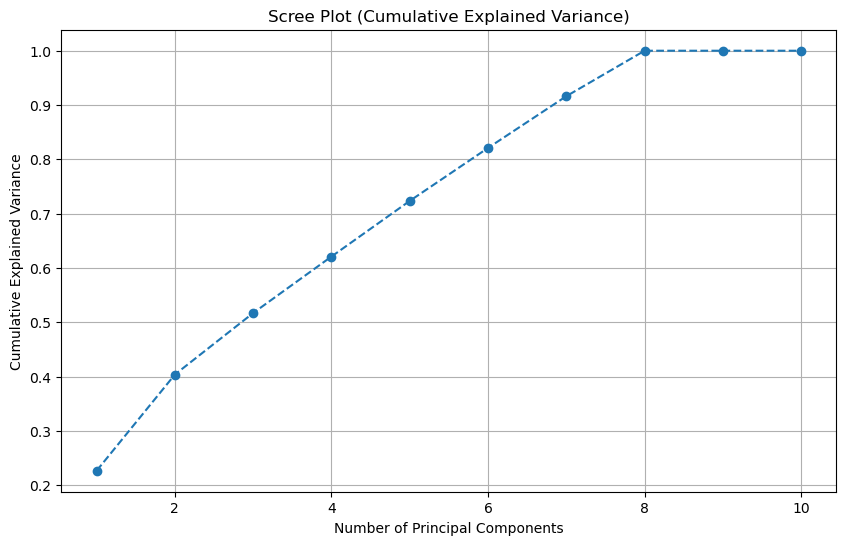

In [40]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot (Cumulative Explained Variance)')
plt.grid(True)
plt.show()

In [41]:
n_components = np.argmax(np.cumsum(explained_variance_ratio) >= 0.95) + 1
print(f"\nNumber of components selected: {n_components}")


Number of components selected: 8


In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('classifier', LogisticRegression(solver='liblinear'))
])

cv = KFold(n_splits=5, shuffle=True, random_state=42)

with mlflow.start_run(run_name="PCA_LogisticRegression"):

    predictions = cross_val_predict(pipeline, X, y, cv=cv)

    f1 = f1_score(y, predictions)
    accuracy = accuracy_score(y, predictions)
    precision = precision_score(y, predictions)
    recall = recall_score(y, predictions)
    tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
    
    mlflow.log_param("n_pca_components", n_components)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("true_positive", tp)
    mlflow.log_metric("true_negative", tn)
    mlflow.log_metric("false_positive", fp)
    mlflow.log_metric("false_negative", fn)
    
    print(f"\nF1-Score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")
    print(classification_report(y, predictions))
    
    mlflow.sklearn.log_model(pipeline, "logistic_regression_with_pca")

# Experiment 6

In [ ]:
mlflow.set_experiment("Experiment#6")

In [42]:
import mlflow
import dagshub
import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, classification_report


In [43]:
X = df.drop(columns=['Potability'])
y = df['Potability']

In [44]:
base_classifiers = [
    ('lr', LogisticRegression(solver='liblinear')),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

meta_classifier = LogisticRegression(solver='liblinear')

stacking_clf = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)

In [45]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('stacking', stacking_clf)
])

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

with mlflow.start_run(run_name="Stacking_Classifier_Experiment"):
    predictions = cross_val_predict(pipeline, X, y, cv=cv)
    f1 = f1_score(y, predictions)
    accuracy = accuracy_score(y, predictions)
    precision = precision_score(y, predictions)
    recall = recall_score(y, predictions)
    tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
    
    mlflow.log_param("base_classifiers", ['Logistic Regression', 'Random Forest', 'XGBClassifier'])
    mlflow.log_param("meta_classifier", 'Logistic Regression')
    
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("true_positive", tp)
    mlflow.log_metric("true_negative", tn)
    mlflow.log_metric("false_positive", fp)
    mlflow.log_metric("false_negative", fn)

    print(f"\nF1-Score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")
    print(classification_report(y, predictions))

    mlflow.sklearn.log_model(pipeline, "stacking_classifier_model")

# Experiment 7

In [ ]:
mlflow.set_experiment("Experiment#7")

In [ ]:
pip install scikit-optimize

In [46]:
import skopt
print(skopt.__version__)

0.10.2


In [47]:
import skopt

import mlflow
import dagshub
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, classification_report
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical

In [48]:
X = df.drop(columns=['Potability'])
y = df['Potability']

In [49]:
preprocessing_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

In [50]:
param_space = {
    'classifier__n_estimators': Integer(50, 300),
    'classifier__max_depth': Integer(3, 20),
    'classifier__min_samples_split': Integer(2, 10),
    'classifier__min_samples_leaf': Integer(1, 10),
    'classifier__criterion': Categorical(['gini', 'entropy'])
}

In [51]:
pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [ ]:
bayes_search = BayesSearchCV(
    pipeline,
    search_spaces=param_space,
    n_iter=30,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

with mlflow.start_run(run_name="Bayesian_Optimization_RandomForest"):
    bayes_search.fit(X, y)

    best_params = bayes_search.best_params_
    best_score = bayes_search.best_score_
    best_model = bayes_search.best_estimator_

    predictions = cross_val_predict(best_model, X, y, cv=5)
    
    f1 = f1_score(y, predictions)
    accuracy = accuracy_score(y, predictions)
    precision = precision_score(y, predictions)
    recall = recall_score(y, predictions)
    tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
    
    mlflow.log_params(best_params)
    
    mlflow.log_metric("best_cv_f1_score", best_score)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("true_positive", tp)
    mlflow.log_metric("true_negative", tn)
    mlflow.log_metric("false_positive", fp)
    mlflow.log_metric("false_negative", fn)
    
    print("\nBest Hyperparameters:", best_params)
    print(f"Best Cross-Validation F1-Score: {best_score:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")
    print(classification_report(y, predictions))

    mlflow.sklearn.log_model(best_model, "random_forest_bayesian_optimization")

# Plot of F1 Scores

In [ ]:
pip install matplotlib pandas

In [52]:
import mlflow
import mlflow.tracking
import matplotlib.pyplot as plt
import numpy as np

In [53]:
mlflow.set_tracking_uri("https://dagshub.com/chinmay.gedam30/Water_qu.mlflow")

In [54]:
f1_scores = {
    "Logistic Regression": 0.09,   
    "Ridge Classifier": 0.15,      
    "Random Forest Classifier": 1,  
    "XGBClassifier": 1          
}

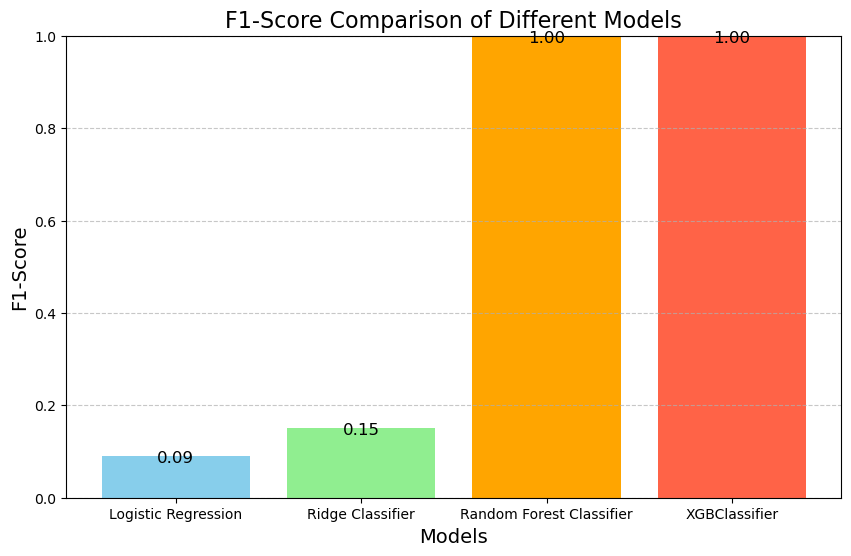

In [55]:
plt.figure(figsize=(10, 6))
models = list(f1_scores.keys())
scores = list(f1_scores.values())

bars = plt.bar(models, scores, color=['skyblue', 'lightgreen', 'orange', 'tomato'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height - 0.02, f'{height:.2f}',
             ha='center', va='bottom', fontsize=12, color='black')

plt.title('F1-Score Comparison of Different Models', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('F1-Score', fontsize=14)
plt.ylim(0, 1)  # Set y-axis limit to [0, 1]
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# Saving the File using Joblib

In [ ]:
pip install joblib

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [57]:
import joblib

# Save the trained Random Forest model to a file
joblib.dump(rf_model, 'potability_rforest_model.pkl')
print("Model saved as 'potability_rforest_model.pkl'")

Model saved as 'potability_rforest_model.pkl'


In [58]:
# Load the saved model
loaded_model = joblib.load('random_forest_model.pkl')
print("Model loaded successfully.")

# Example prediction
sample_input = X_test[:5]
predictions = loaded_model.predict(sample_input)
print("Predictions on sample input:", predictions)


Model loaded successfully.
Predictions on sample input: [1 0 2 1 1]
